# Trabalho Final

### Regras:

1. Pode ser feito individualmente ou em dupla (porém cada um deve colocar o código em um arquivio próprio);
2. O arquivo deve ser salvo como: "Trabalho_seunome.ipynb" e entregue na plataforma ou no e-mail: `profmatheus.pacheco@fiap.com.br`,
3. O Trabalho deve ser entregue no máximo até dia `20/09/2022`;
4. Escolhe apenas 1 dos 3 enunciados propostos.




## Importing the libraries 

In [6]:
from functools import reduce
import numpy as np
import pandas as pd
import random
import sympy as smp
import matplotlib.pyplot as plt

# Enunciados

### Cadeia de Markov

Uma guarda de trânsito é designada para controlar o trâfego nos oito cruzametos da rua central. Ela é instruida a permanecer em cada cruzamento por uma hora e, em seguida, ou permanecer no mesmo cruzamento ou seguir para um cruzamento adjacente. Para evitar que ela estabeleça um padrão, ela deve escolher o novo cruzamento de maneira aleatória, com qualquer escolha igualmente provável. Por exemplo, se ela está no cruzamento 5, seu próximo cruzamento pode ser 2, 4, 5 ou 8, cada um com probabilidade de $\frac{1}{4}$. Cada dia ela começa no cruzamento em que parou no dia anterior. A matriz de transição desta cadeia de Markov é :

```py
import numpy as np 

C = np.array([[1/3, 1/3, 0  , 1/4, 0  , 0  , 0  , 0  ],
              [1/3, 1/3, 0  , 0  , 1/4, 0  , 0  , 0  ],
              [0  , 0  , 1/3, 0, 0  , 1/3, 0  , 0  ],
              [1/3, 0  , 1/3, 1/4, 1/4, 0  , 1/4, 0  ],
              [0  , 1/3, 0  , 1/4, 1/4, 0  , 0  , 1/2],
              [0  , 0  , 1/3, 0  , 0  , 1/3, 1/4, 0  ],
              [0  , 0  , 0  , 1/4, 0  , 1/3, 1/4, 0],
              [0  , 0  , 0  , 0  , 1/4, 0  , 1/4, 1/2]])

```

Através do método das Cadeias de Markov, calcule a tendência de probabilidade levando em conta os oitos cruzamentos


Obs: Você deve provar com 4 vetores-estado diferentes que eles convergem para o mesmo valor.

## The resolution consist of 
* Create four random state-vector (x1, x2, x3 and x4)
* Multiply them for the C matrix i.e verify in which crossings she will going to starts next day  
* Multiply the result obtained in the previous step for C again. Take this step more 100 times (I'm using 100 because it wasn't specified an the acceptable error in the convergence process)
* Compare the results, check if: $C*(x_i)^{99}=x_i^{100}$ for any i
### The conclusion is that the probabilites converges!

In [3]:
# Sua resposta aqui
C = np.array([[1/3, 1/3, 0  , 1/4, 0  , 0  , 0  , 0  ],
              [1/3, 1/3, 0  , 0  , 1/4, 0  , 0  , 0  ],
              [0  , 0  , 1/3, 0, 0  , 1/3, 0  , 0  ],
              [1/3, 0  , 1/3, 1/4, 1/4, 0  , 1/4, 0  ],
              [0  , 1/3, 0  , 1/4, 1/4, 0  , 0  , 1/2],
              [0  , 0  , 1/3, 0  , 0  , 1/3, 1/4, 0  ],
              [0  , 0  , 0  , 1/4, 0  , 1/3, 1/4, 0],
              [0  , 0  , 0  , 0  , 1/4, 0  , 1/4, 1/2]])

In [4]:
def random_state(rows = 8):
    """This function generates a (n-row, 1) array with zeros and a single output with value one 

    Args:
        rows (int, optional): _description_. Defaults to 8.

    Returns:
        numpy array: random array
    """
    state = np.zeros(rows)
    state[random.randint(0,rows-1)] = 1
    return state.reshape(rows,1)

In [5]:
"A smart way to create x1, x2, ..."
for i in range(4):
    locals()[f'x{i+1}'] = random_state()

In [9]:
first_day_position = {}
for i in range(4):
    first_day_position[f'x{i+1}'] = locals()[f'x{i+1}'].reshape(8)
print(pd.DataFrame(first_day_position, index=range(1,9)))

         x1        x2        x3        x4
1  0.145997  0.145997  0.145997  0.145997
2  0.160126  0.160126  0.160126  0.160126
3  0.018838  0.018838  0.018838  0.018838
4  0.175824  0.175824  0.175824  0.175824
5  0.232339  0.232339  0.232339  0.232339
6  0.037677  0.037677  0.037677  0.037677
7  0.075353  0.075353  0.075353  0.075353
8  0.153846  0.153846  0.153846  0.153846


In [30]:
probable_position_99 = {}
probable_position_100 = {}

locals()[f'p{i+1}'] = np.dot(C, locals()[f'x{i+1}'])

"Calculating the 100 iterations"
for j in range(1, 101):
    for i in range(4):
        locals()[f'p{i+1}'] = np.dot(C, locals()[f'p{i+1}'])
        if j == 99:
            probable_position_99[f'p{i+1}'] = locals()[f'p{i+1}'].reshape(8)
        if j == 100:
            probable_position_100[f'p{i+1}'] = locals()[f'p{i+1}'].reshape(8)

"Puting it in a dataframe"
for i in range(4):
    probable_position_99[f'p{i+1}'] = locals()[f'p{i+1}'].reshape(8)
    probable_position_100[f'p{i+1}'] = locals()[f'p{i+1}'].reshape(8)
df_probable_position_99 = pd.DataFrame(probable_position_99, index=range(1,9))
df_probable_position_100 = pd.DataFrame(probable_position_100, index=range(1,9))

"printing the last one, just to confirm"
print(pd.DataFrame(probable_position_100, index=range(1,9)))

"generating latex code with array data"
latex99 = smp.print_latex(smp.Matrix(df_probable_position_99.to_numpy().round(3)))
latex100 = smp.print_latex(smp.Matrix(df_probable_position_100.to_numpy().round(3)))

         p1        p2        p3        p4
1  0.145997  0.145997  0.145997  0.145997
2  0.160126  0.160126  0.160126  0.160126
3  0.018838  0.018838  0.018838  0.018838
4  0.175824  0.175824  0.175824  0.175824
5  0.232339  0.232339  0.232339  0.232339
6  0.037677  0.037677  0.037677  0.037677
7  0.075353  0.075353  0.075353  0.075353
8  0.153846  0.153846  0.153846  0.153846
\left[\begin{matrix}0.146 & 0.146 & 0.146 & 0.146\\0.16 & 0.16 & 0.16 & 0.16\\0.019 & 0.019 & 0.019 & 0.019\\0.176 & 0.176 & 0.176 & 0.176\\0.232 & 0.232 & 0.232 & 0.232\\0.038 & 0.038 & 0.038 & 0.038\\0.075 & 0.075 & 0.075 & 0.075\\0.154 & 0.154 & 0.154 & 0.154\end{matrix}\right]
\left[\begin{matrix}0.146 & 0.146 & 0.146 & 0.146\\0.16 & 0.16 & 0.16 & 0.16\\0.019 & 0.019 & 0.019 & 0.019\\0.176 & 0.176 & 0.176 & 0.176\\0.232 & 0.232 & 0.232 & 0.232\\0.038 & 0.038 & 0.038 & 0.038\\0.075 & 0.075 & 0.075 & 0.075\\0.154 & 0.154 & 0.154 & 0.154\end{matrix}\right]


If we put the two matrices, the first referent to the probability of the four intial random state after ninety-nine interactions, and the second referring to hundredth interaction together we see they are the same. The conclusion is that the probability converge regardless the initial state

$$\left[\begin{matrix}0.146 & 0.146 & 0.146 & 0.146\\0.16 & 0.16 & 0.16 & 0.16\\0.019 & 0.019 & 0.019 & 0.019\\0.176 & 0.176 & 0.176 & 0.176\\0.232 & 0.232 & 0.232 & 0.232\\0.038 & 0.038 & 0.038 & 0.038\\0.075 & 0.075 & 0.075 & 0.075\\0.154 & 0.154 & 0.154 & 0.154\end{matrix}\right] \ \ \ \left[\begin{matrix}0.146 & 0.146 & 0.146 & 0.146\\0.16 & 0.16 & 0.16 & 0.16\\0.019 & 0.019 & 0.019 & 0.019\\0.176 & 0.176 & 0.176 & 0.176\\0.232 & 0.232 & 0.232 & 0.232\\0.038 & 0.038 & 0.038 & 0.038\\0.075 & 0.075 & 0.075 & 0.075\\0.154 & 0.154 & 0.154 & 0.154\end{matrix}\right]$$

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

### Método dos mínimos Quadrados

Encontre o polinômio cúbico utilizando o método de mínimos quadráticos, use os pontos $(-1,-10), (0,5), (1,6), (2,11) e (3,42)$.

Obs: Utilize a equação $$ax^{3}+bx^{2}+cx+d$$



Obs2: Plote os gráficos demonstrando a curva que melhor se ajusta aos pontos.

## Resolution
So you want to minimize $S= \sum_{i=0}^4\left (p(x_i)-y_i\right )^2$ where $p(x)=\sum_{k=0}^3 a_kx^k$
The parameters you want to find are the ak. You need to differentiate S with respect to each ak and set that expression equal to zero.

This will give you 4 equations in the 4 aks.

Here is a typical one:

$$\begin{aligned}
\dfrac{\partial S}{\partial a_k}
&=\dfrac{\partial }{\partial a_k}\sum_{i=0}^4\left( p(x_i)-y_i\right)^2\\
&=\sum_{i=0}^4 \dfrac{\partial }{\partial a_k}\left(p(x_i)-y_i\right)^2\\
&=\sum_{i=0}^4 2\dfrac{\partial }{\partial a_k}(p(x_i)-y_i)(p(x_i)-y_i)\\
&=\sum_{i=0}^4 2\dfrac{\partial }{\partial a_k}(\sum_{j=0}^3 a_jx_i^j)(p(x_i)-y_i)\\
&=\sum_{i=0}^4 2( x_i^k)(\sum_{j=0}^3 a_jx_i^j-y_i)\\
&=2(\sum_{j=0}^3 a_j\sum_{i=0}^4 x_i^{j+k}-\sum_{i=0}^4 x_i^ky_i)\end{aligned}$$

Setting $\dfrac{\partial S}{\partial a_k} = 0$, this gives $\sum_{j=0}^3 a_j\sum_{i=0}^4 x_i^{j+k}=\sum_{i=0}^4 x_i^ky_i$ for $k=0$ to $3$.

These are the equations that determine the $a_j$.

From this we can build a set of linear equations for a polynomial of order $k$ gien $N$ observations $(x_i, y_i)$: 

$$
\begin{bmatrix}
N & \sum_{i=1}^{N} x_i & \cdots  & \sum_{i=1}^{N} x_i^k \\ 
\sum_{i=1}^{N} x_i & \sum_{i=1}^{N} x_i^2 & \cdots & \sum_{i=1}^{N} x_i^{k+1} \\ 
\vdots & \vdots & \vdots & \vdots \\ 
\sum_{i=1}^{N} x_i^k & \sum_{i=1}^{N} x_i^{k+1} & \cdots & \sum_{i=1}^{N} x_i^{2k}
\end{bmatrix}
\begin{bmatrix} 
a_0 \\
a_1 \\
\vdots \\
a_k \\
\end{bmatrix}=
\begin{bmatrix} 
\sum_{i=1}^{N} y_i \\
\sum_{i=1}^{N} x_i y_i \\
\vdots \\
\sum_{i=1}^{N} x_i^k y_i \\
\end{bmatrix}
$$

Or just: $Xa=Y$

In [7]:
"points"
p1, p2, p3, p4, p5 = (-1,-10), (0,5), (1,6), (2,11), (3,42)

In [8]:
"Breaking p in x and y"
x = []
y = []
for i in range(5):
    x.append(locals()[f'p{i+1}'][0])
    y.append(locals()[f'p{i+1}'][1])
x = np.array(x)
y = np.array(y)
print(x, y)

[-1  0  1  2  3] [-10   5   6  11  42]


In [9]:
"Calculating X"
X = np.array([[5, sum(x), sum(x**2), sum(x**3)],
          [sum(x), sum(x**2), sum(x**3), sum(x**4)],
          [sum(x**2), sum(x**3), sum(x**4), sum(x**5)],
          [sum(x**3), sum(x**4), sum(x**5), sum(x**6)]])

smp.Matrix(X)

Matrix([
[ 5,  5,  15,  35],
[ 5, 15,  35,  99],
[15, 35,  99, 275],
[35, 99, 275, 795]])

In [10]:
"Calculating Y"
Y = np.array([[sum(y)],
             [sum(x*y)],
             [sum(x**2*y)],
             [sum(x**3*y)]])

smp.Matrix(Y)

Matrix([
[  54],
[ 164],
[ 418],
[1238]])

$$\begin{aligned} Xa &= Y \\ 
                  X^{-1}Xa &= X^{-1}Y     \\
                  a &= X^{-1}Y     
\end{aligned}$$

In [11]:
"Calculating a"
a = np.dot(np.linalg.inv(X),Y)
smp.Matrix(a)

Matrix([
[ 5.22857142857117],
[ 4.52380952380943],
[-7.42857142857127],
[  3.3333333333333]])

In [12]:
"Criating the curve"
x2 = np.linspace(-4, 4, 100)
y2 = a[0] + a[1]*x2**1 + a[2]*x2**2 + a[3]*x2**3

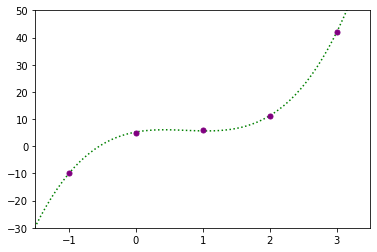

In [17]:
"Plotting the result"
plt.plot(x2, y2, linestyle=':', color="green", ms=5)
plt.plot(x, y, 'o', color="purple", ms=5)
plt.xlim(-1.5,3.5)
plt.ylim(-30,50)
plt.show()